In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [2]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<strong>numpy.arange([start, ]stop, [step, ]dtype=None)</strong>
* Return evenly spaced values within a given interval.

* Values are generated within the half-open interval [start, stop) (in other words, the interval including start but excluding stop). 
* For integer arguments the function is equivalent to the Python built-in range function, but returns an ndarray rather than a list.

* When using a non-integer step, such as 0.1, the results will often not be consistent. It is better to use numpy.linspace for these cases.

For more details <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html">Click Here</a>

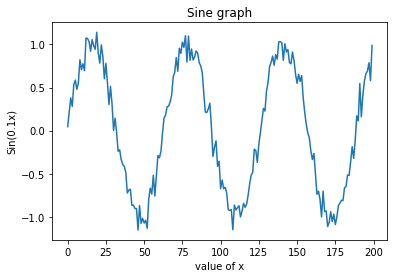

In [21]:
 # Make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

# Plot it
plt.plot(series)
plt.xlabel("value of x")
plt.ylabel("Sin(0.1x)")
plt.title("Sine graph")
plt.show()

In [22]:
# Build the dataset
# Let's see if we can use T pas values to predict the next value
T = 10 # That means we use previous 10 time-steps to predict the next time step.
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
# Cast List into numpy array
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print(f"X.shape: {X.shape}, Y.shape: {Y.shape}")


X.shape: (190, 10), Y.shape: (190,)


In [23]:
# Try autoregressive Linear Model
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i, x)

# Compile the model
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1),
)

# Train the RNN
"""
Note: Do not take the sample randomly, as we need to forecast the future data.
Thus, we train the model with first half and validate it with other half.
Since Sinusoidal is periodic, This is non-issue in the following script.
"""
result = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 1s 6ms/sample - loss: 0.2428 - val_loss: 0.0497
Epoch 2/80
95/95 [==============================] - 0s 372us/sample - loss: 0.0416 - val_loss: 0.0522
Epoch 3/80
95/95 [==============================] - 0s 441us/sample - loss: 0.0628 - val_loss: 0.0756
Epoch 4/80
95/95 [==============================] - 0s 417us/sample - loss: 0.0707 - val_loss: 0.0720
Epoch 5/80
95/95 [==============================] - 0s 468us/sample - loss: 0.0531 - val_loss: 0.0399
Epoch 6/80
95/95 [==============================] - 0s 485us/sample - loss: 0.0294 - val_loss: 0.0229
Epoch 7/80
95/95 [==============================] - 0s 464us/sample - loss: 0.0302 - val_loss: 0.0355
Epoch 8/80
95/95 [==============================] - 0s 455us/sample - loss: 0.0337 - val_loss: 0.0330
Epoch 9/80
95/95 [==============================] - 0s 409us/sample - loss: 0.0296 - val_loss: 0.0219
Epoch 10/80
95/95 [=====================

95/95 [==============================] - 0s 459us/sample - loss: 0.0195 - val_loss: 0.0199


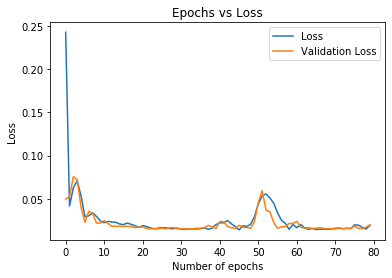

In [24]:
# Plot loss per Epoch
plt.plot(result.history['loss'], label="Loss")
plt.plot(result.history['val_loss'], label="Validation Loss")
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Epochs vs Loss")
plt.show()

In [25]:
# "WRONG" forecast using TRUE targets 
#*** Avoid using true targets for forecast

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0,0]  # 1x1 array -> scaler
    i += 1
    
    # update the predictions list
    validation_predictions.append(p)

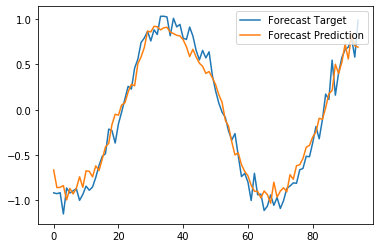

In [26]:
plt.plot(validation_target, label="Forecast Target")
plt.plot(validation_predictions, label="Forecast Prediction")
plt.legend()

In [27]:
# Forecast future values
# Use only self-predictions for making future predictions

validation_target = Y[-N//2:]
validation_predictions = []

# Last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0]
    
    # update the prediction list
    validation_predictions.append(p)
    
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

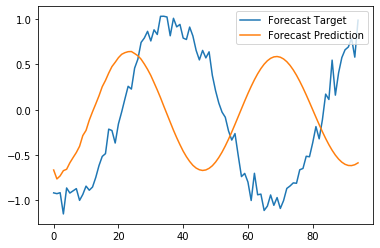

In [28]:
plt.plot(validation_target, label="Forecast Target")
plt.plot(validation_predictions, label="Forecast Prediction")
plt.legend()
plt.show()